In [1]:
# import scipy.io
import numpy as np
import pandas as pd
import os
import wfdb
from IPython.display import display
import matplotlib.pyplot as plt
import csv

In [2]:
mat = pd.read_csv('../data/annotations/csv/annotation_1001.csv', skip_blank_lines=False)
files = os.listdir('../data/annotations/csv/')

In [3]:
## Get the annotations and put the indices into arrays
uc_list = []
dec_list = []
acc_list = []
tachy_list = []
brady_list = []

with open('../data/annotations/csv/annotation_1001.csv', newline='') as csvfile:
    annreader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(annreader):
        joined_row = ''.join(row)
        if 'UC' in joined_row:
            uc_list.append(i)
        if 'DEC' in joined_row:
            dec_list.append(i)
        if 'ACC' in joined_row:
            acc_list.append(i)
        if 'TC' in joined_row:
            tachy_list.append(i)
        if 'BC' in joined_row:
            brady_list.append(i)
            
uc_arr = np.array(uc_list) 
dc_arr = np.array(dec_list)
ac_arr= np.array(acc_list)
tc_arr = np.array(tachy_list)
bc_arr = np.array(brady_list)

In [5]:
# check uc indices 
uc_arr

array([  425,   744,   966,  1136,  1457,  1641,  2470,  2791,  3293,
        3554,  4220,  4515,  4919,  5219,  5519,  5879,  6119,  6359,
        6479,  6719,  7019,  7319,  7439,  7619,  7799,  8039,  8159,
        8879,  9239,  9359, 10079, 10319, 10799, 11159, 11399, 11519,
       11759, 11999, 12239, 12479, 12839, 13019, 13319, 13559, 13799,
       14039, 14279])

In [31]:
df1001 = pd.read_csv('../data/database/signals/1001.csv')
df1001.head(15)

,seconds,FHR,UC
0,0,150.50,7.0
1,1,150.50,8.5
2,2,151.00,8.5
3,3,151.25,7.5
4,4,151.25,9.5
5,5,150.25,8.5
6,6,150.25,10.5
7,7,150.25,12.0
8,8,148.75,11.0
9,9,148.75,11.5


In [33]:
record = wfdb.rdrecord('../data/physionet_data/1001', sampfrom=0, sampto=14400)
p_sig = pd.DataFrame(record.p_signal)
p_sig.head(15)

,0,1
0,150.50,7.0
1,150.50,8.5
2,151.00,8.5
3,151.25,7.5
4,151.25,9.5
5,150.25,8.5
6,150.25,10.5
7,150.25,12.0
8,148.75,11.0
9,148.75,11.5


In [34]:
start = 0
end = 14400
uc_filter = np.logical_and(np.greater_equal(uc_arr, start), np.less_equal(uc_arr, end))
uc_arr[uc_filter]

array([  425,   744,   966,  1136,  1457,  1641,  2470,  2791,  3293,
        3554,  4220,  4515,  4919,  5219,  5519,  5879,  6119,  6359,
        6479,  6719,  7019,  7319,  7439,  7619,  7799,  8039,  8159,
        8879,  9239,  9359, 10079, 10319, 10799, 11159, 11399, 11519,
       11759, 11999, 12239, 12479, 12839, 13019, 13319, 13559, 13799,
       14039, 14279])

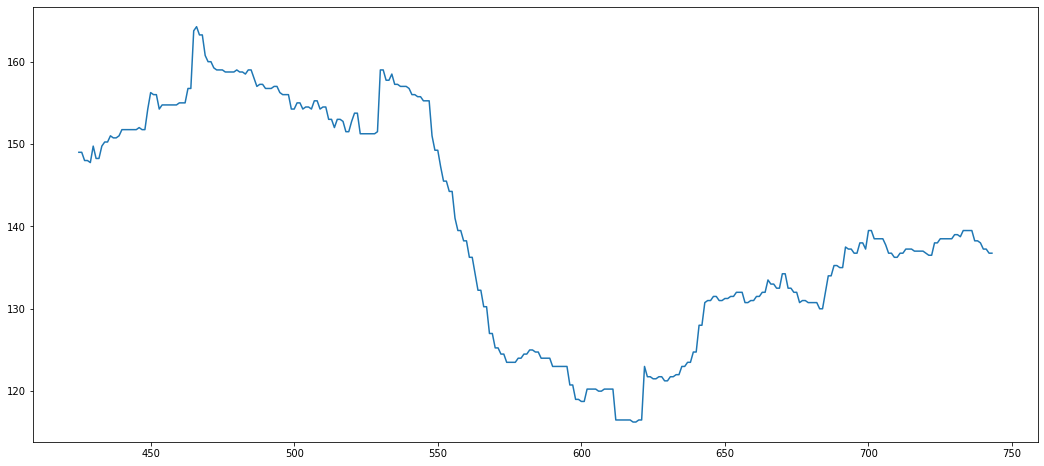

In [35]:
plt.figure(figsize=(18,8))
plt.plot(df1001['seconds'][425:744], df1001['FHR'][425:744])

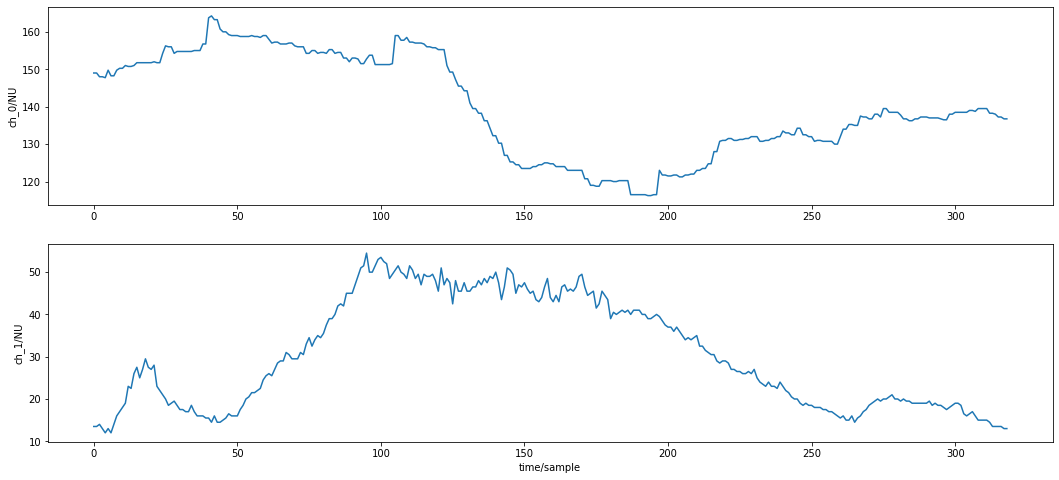

In [36]:
record = wfdb.rdrecord('../data/physionet_data/1001', sampfrom=425, sampto=744)
wfdb.plot_items(signal=record.p_signal, fs=4,
                    ann_samp=[],
                    figsize=(18,8))

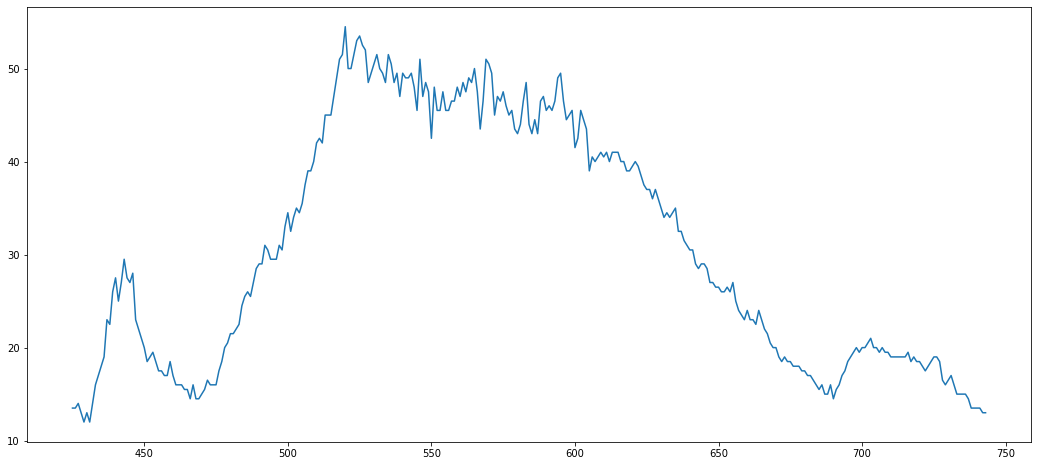

In [37]:
plt.figure(figsize=(18,8))
plt.plot(df1001['seconds'][425:744], df1001['UC'][425:744])

In [49]:
for i in range(0, len(uc_arr)-1, 2):
    print((uc_arr[i], uc_arr[i+1]))

(425, 744)
(966, 1136)
(1457, 1641)
(2470, 2791)
(3293, 3554)
(4220, 4515)
(4919, 5219)
(5519, 5879)
(6119, 6359)
(6479, 6719)
(7019, 7319)
(7439, 7619)
(7799, 8039)
(8159, 8879)
(9239, 9359)
(10079, 10319)
(10799, 11159)
(11399, 11519)
(11759, 11999)
(12239, 12479)
(12839, 13019)
(13319, 13559)
(13799, 14039)


In [46]:
uc_arr

array([  425,   744,   966,  1136,  1457,  1641,  2470,  2791,  3293,
        3554,  4220,  4515,  4919,  5219,  5519,  5879,  6119,  6359,
        6479,  6719,  7019,  7319,  7439,  7619,  7799,  8039,  8159,
        8879,  9239,  9359, 10079, 10319, 10799, 11159, 11399, 11519,
       11759, 11999, 12239, 12479, 12839, 13019, 13319, 13559, 13799,
       14039, 14279])

In [47]:
with open('../data/annotations/csv/annotation_1001.csv') as file_name:
    file_read = csv.reader(file_name)
    array = list(file_read)
df = pd.DataFrame(array)

In [50]:
df.iloc[uc_arr, :]

,0,1,2,3,4
425,,,,,(UC1
744,,,,,)UC1
966,,,,,(UC2
1136,,,,,)UC2
1457,,,,,(UC3
1641,,,,,)UC3
2470,,,,,(UC4
2791,,,,,)UC4
3293,,,,,(UC5
3554,,,,,)UC5


In [27]:
# for record in records[1:]:
#     fhr_name = os.path.join(os.path.abspath('../data/images'), record, 'fhr')
#     uc_name = os.path.join(os.path.abspath('../data/images'), record, 'uc')
#     if not os.path.exists(fhr_name):
#         os.mkdir(fhr_name)
#     if not os.path.exists(uc_name):    
#         os.mkdir(uc_name)

In [19]:
os.path.abspath('../data/images')

'/Users/landonblakey/UVA/S4/DS6011/data/images'

In [ ]:
def save_fig(fpath, )